In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

my_dataset=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")

my_dataset.head()

my_dataset=my_dataset.shift(1)
my_dataset.iloc[0]=my_dataset.columns

X = my_dataset.iloc[:, 1:31].values
y = my_dataset.iloc[:, 31].values

print("Cancer data set dimensions : {}".format(my_dataset.shape))

headerList = ['id', 'diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension',
              'SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension',
              'worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

# converting data frame to csv
my_dataset.to_csv("/content/drive/MyDrive/Analytics - Cancer/cancer.csv", header=headerList, index=False)

Cancer data set dimensions : (568, 32)


['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave points',
 'mean_symmetry',
 'mean_fractal dimension',
 'SE_radius',
 'SE_texture',
 'SE_perimeter',
 'SE_area',
 'SE_smoothness',
 'SE_compactness',
 'SE_concavity',
 'SE_concave points',
 'SE_symmetry',
 'SE_fractal dimension',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave points',
 'worst_symmetry',
 'worst_fractal dimension']

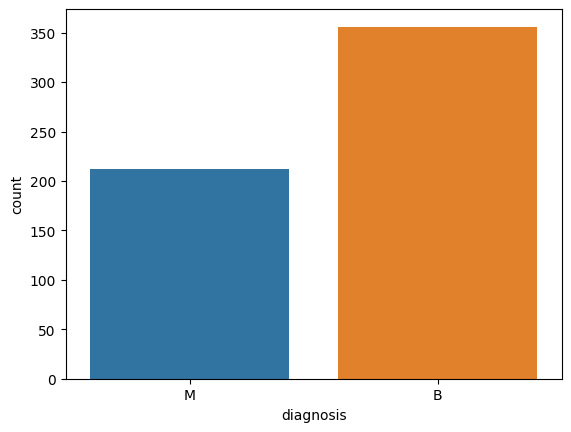

In [3]:
# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Analytics - Cancer/cancer.csv')
X = dataset.iloc[:, 1:31].values
y = dataset.iloc[:, 31].values

dataset.head()

dataset.shape

dataset['diagnosis'].describe()

sns.countplot(x=dataset['diagnosis'], data=dataset)

lis1=headerList[2:]
lis1



In [4]:
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave points        0
mean_symmetry              0
mean_fractal dimension     0
SE_radius                  0
SE_texture                 0
SE_perimeter               0
SE_area                    0
SE_smoothness              0
SE_compactness             0
SE_concavity               0
SE_concave points          0
SE_symmetry                0
SE_fractal dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave points       0
worst_symmetry             0
worst_fractal dimension    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
dataset['diagnosis'] = labelencoder_Y.fit_transform(dataset['diagnosis'])

dataset.tail()

dataset.to_csv("/content/drive/MyDrive/Analytics - Cancer/cancer.csv", header=headerList, index=False)

KNN True Positive Rate: 0.9590643274853801
KNN Precision: 0.9590024443825612
KNN Accuracy: 0.9590643274853801
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

K-Nearest Neighbors Confusion Matrix:
[[104   3]
 [  4  60]]
KNN Model k-fold scores:
Fold 1: 0.3860
Fold 2: 0.0789
Fold 3: 0.1053
Fold 4: 0.1593
Fold 5: 0.6283
Mean Accuracy: 0.27155721161310353
Standard Deviation: 0.2086736843193475
-------------------------------------
DT True Positive Rate: 0.9473684210526315
DT Precision: 0.9475975861278741
DT Accuracy: 0.9473684210526315
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       107


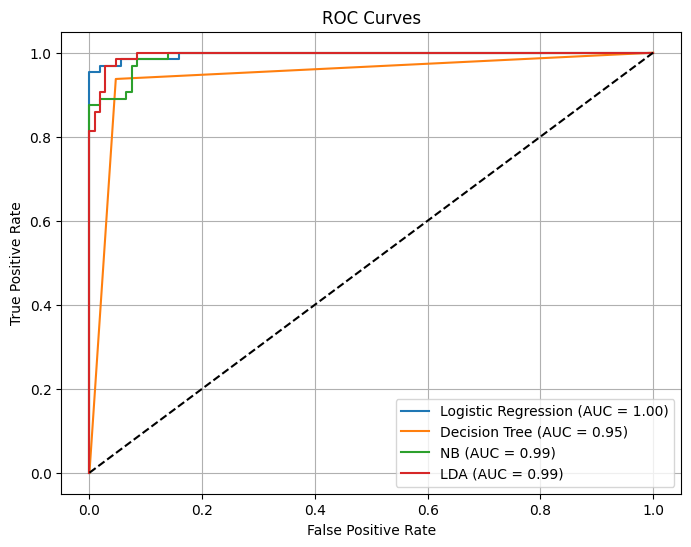

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import cross_val_score

dataset = pd.read_csv("/content/drive/MyDrive/Analytics - Cancer/cancer.csv")
X=dataset.drop(['diagnosis'],axis=1)
X.head()
y=dataset['diagnosis']
y.head()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Predict probabilities and calculate ROC metrics for KNN
knn_probs = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_roc_auc = roc_auc_score(y_test, knn_probs)

# Create and train the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# Predict probabilities and calculate ROC metrics for Decision Tree
decision_tree_probs = dt.predict_proba(X_test)[:, 1]
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)
dt_roc_auc = roc_auc_score(y_test, decision_tree_probs)

# Create and train the Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

# Predict probabilities and calculate ROC metrics for LR
LR_probs = lr.predict_proba(X_test)[:, 1]
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
LR_roc_auc = roc_auc_score(y_test, LR_probs)

#Create and Train NB classifier
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_predictions = NB_model.predict(X_test)

# Predict probabilities and calculate ROC metrics for NB
NB_probs = NB_model.predict_proba(X_test)[:, 1]
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_probs)
NB_roc_auc = roc_auc_score(y_test, NB_probs)

#Create and Train LDA classifier
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_predictions = LDA_model.predict(X_test)

# Predict probabilities and calculate ROC metrics for LDA
LDA_probs = LDA_model.predict_proba(X_test)[:, 1]
LDA_fpr, LDA_tpr, _ = roc_curve(y_test, LDA_probs)
LDA_roc_auc = roc_auc_score(y_test, LDA_probs)

# Calculate confusion matrices
knn_cm = metrics.confusion_matrix(y_test, knn_predictions)
dt_cm = metrics.confusion_matrix(y_test, dt_predictions)
lr_cm = metrics.confusion_matrix(y_test, lr_predictions)
nb_cm = metrics.confusion_matrix(y_test, NB_predictions)
lda_cm = metrics.confusion_matrix(y_test, LDA_predictions)

# Calculate True Positive Rate, Precision, and Accuracy
knn_tpr = metrics.recall_score(y_test, knn_predictions, average='weighted')
dt_tpr = metrics.recall_score(y_test, dt_predictions, average='weighted')
lr_tpr = metrics.recall_score(y_test, lr_predictions, average='weighted')
nb_tpr = metrics.recall_score(y_test, NB_predictions, average='weighted')
lda_tpr = metrics.recall_score(y_test, LDA_predictions, average='weighted')

knn_precision = metrics.precision_score(y_test, knn_predictions, average='weighted')
dt_precision = metrics.precision_score(y_test, dt_predictions, average='weighted')
lr_precision = metrics.precision_score(y_test, lr_predictions, average='weighted')
nb_precision = metrics.recall_score(y_test, NB_predictions, average='weighted')
lda_precision = metrics.recall_score(y_test, LDA_predictions, average='weighted')

knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)
dt_accuracy = metrics.accuracy_score(y_test, dt_predictions)
lr_accuracy = metrics.accuracy_score(y_test, lr_predictions)
accuracy_NB = accuracy_score(y_test, NB_predictions)
accuracy_LDA = accuracy_score(y_test, LDA_predictions)

# Perform 5-fold cross-validation and store the scores
scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores_dt = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
scores_lr = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
scores_nb = cross_val_score(NB_model, X, y, cv=5, scoring='accuracy')
scores_lda = cross_val_score(LDA_model, X, y, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of accuracy scores
knn_mean_accuracy = scores_knn.mean()
knn_std_accuracy = scores_knn.std()

dt_mean_accuracy = scores_dt.mean()
dt_std_accuracy = scores_dt.std()

lr_mean_accuracy = scores_lr.mean()
lr_std_accuracy = scores_lr.std()

nb_mean_accuracy = scores_nb.mean()
nb_std_accuracy = scores_nb.std()

lda_mean_accuracy = scores_lda.mean()
lda_std_accuracy = scores_lda.std()

#Print the results
print("KNN True Positive Rate:", knn_tpr)
print("KNN Precision:", knn_precision)
print("KNN Accuracy:", knn_accuracy)
print("Classification Report for KNN:\n", classification_report(y_test, knn_predictions))
print("K-Nearest Neighbors Confusion Matrix:")
print(knn_cm)
# Print the k-fold scores for the KNN model
print("KNN Model k-fold scores:")
for fold, score in enumerate(scores_knn, start=1):
    print(f"Fold {fold}: {score:.4f}")
print("Mean Accuracy:", knn_mean_accuracy)
print("Standard Deviation:", knn_std_accuracy)
print("-------------------------------------")

print("DT True Positive Rate:", dt_tpr)
print("DT Precision:", dt_precision)
print("DT Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:\n", classification_report(y_test, dt_predictions))
print("\nDecision Tree Confusion Matrix:")
print(dt_cm)
# Print the k-fold scores for the decision tree model
print("Decision Tree Model k-fold scores:")
for fold, score in enumerate(scores_dt, start=1):
    print(f"Fold {fold}: {score:.4f}")
print("Mean Accuracy:", dt_mean_accuracy)
print("Standard Deviation:", dt_std_accuracy)
print("-------------------------------------")

print("LR True Positive Rate:", lr_tpr)
print("LR Precision:", lr_precision)
print("LR Accuracy:", lr_accuracy)
print("Classification Report for Logisitc Regression:\n", classification_report(y_test, lr_predictions))
print("\nLogistic Regression Confusion Matrix:")
print(lr_cm)
# Print the k-fold scores for the logistic regression model
print("\nLogistic Regression Model k-fold scores:")
for fold, score in enumerate(scores_lr, start=1):
    print(f"Fold {fold}: {score:.4f}")
print("Mean Accuracy:", lr_mean_accuracy)
print("Standard Deviation:", lr_std_accuracy)
print("-------------------------------------")

print("NB True Positive Rate:", nb_tpr)
print("NB Precision:", nb_precision)
print("NB Accuracy:", accuracy_NB)
print("Classification Report for NB:\n", classification_report(y_test, NB_predictions))
print("\nNB Confusion Matrix:")
print(nb_cm)
# Print the k-fold scores for the NB model
print("NB Model k-fold scores:")
for fold, score in enumerate(scores_nb, start=1):
    print(f"Fold {fold}: {score:.4f}")
print("Mean Accuracy:", nb_mean_accuracy)
print("Standard Deviation:", nb_std_accuracy)
print("-------------------------------------")

print("LDA True Positive Rate:", lda_tpr)
print("LDA Precision:", lda_precision)
print("LDA Accuracy:", accuracy_LDA)
print("Classification Report for LDA:\n", classification_report(y_test, LDA_predictions))
print("\nLDA Confusion Matrix:")
print(lda_cm)
# Print the k-fold scores for the LDA model
print("\nLDA Model k-fold scores:")
for fold, score in enumerate(scores_lda, start=1):
    print(f"Fold {fold}: {score:.4f}")
print("Mean Accuracy:", lda_mean_accuracy)
print("Standard Deviation:", lda_std_accuracy)
print("-------------------------------------")

# Plot ROC curves for the models
plt.figure(figsize=(8, 6))
#plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_roc_auc:.2f})')
plt.plot(LR_fpr, LR_tpr, label=f'Logistic Regression (AUC = {LR_roc_auc:.2f})')
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')
plt.plot(NB_fpr, NB_tpr, label=f'NB (AUC = {NB_roc_auc:.2f})')
plt.plot(LDA_fpr, LDA_tpr, label=f'LDA (AUC = {LDA_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.grid(True)

# Display the plot
plt.show()